In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
dt=pd.read_csv('Nashville_housing_data_2013_2016.csv')
dt

,Unnamed: 0.1,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,...,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,0,0,105 03 0D 008.00,RESIDENTIAL CONDO,1208 3RD AVE S,8,NASHVILLE,2013-01-24,132000,20130128-0008725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,2013-01-11,191500,20130118-0006337,...,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,2,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,2013-01-18,202000,20130124-0008033,...,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,3,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,2013-01-18,32000,20130128-0008863,...,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,4,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,2013-01-23,102000,20130131-0009929,...,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56631,56631,56631,093 13 0B 274.00,RESIDENTIAL CONDO,320 11TH AVE S,274.0,NASHVILLE,2016-10-06,210000,20161007-0106599,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56632,56632,56632,093 13 0D 044.00,RESIDENTIAL CONDO,700 12TH AVE S,608.0,NASHVILLE,2016-10-25,338000,20161101-0115186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56633,56633,56633,093 13 0D 048.00,RESIDENTIAL CONDO,700 12TH AVE S,613.0,NASHVILLE,2016-10-04,742000,20161010-0106889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56634,56634,56634,093 13 0D 056.00,RESIDENTIAL CONDO,700 12TH AVE S,708.0,NASHVILLE,2016-10-26,320000,20161031-0114730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
dt.describe()

,Unnamed: 0.1,Unnamed: 0,Sale Price,Acreage,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath
count,56636.00000,56636.00000,5.663600e+04,26017.000000,26017.000000,2.601700e+04,2.601700e+04,2.601700e+04,24166.000000,24165.000000,24159.000000,24277.000000,24146.000000
mean,28317.50000,28317.50000,3.272111e+05,0.498903,4356.215782,6.907267e+04,1.608025e+05,2.323971e+05,1926.954345,1963.749224,3.090029,1.886106,0.283981
std,16349.54926,16349.54926,9.287425e+05,1.570396,2170.348270,1.060405e+05,2.068041e+05,2.810703e+05,1687.017313,26.546141,0.852942,0.961572,0.487905
min,0.00000,0.00000,5.000000e+01,0.010000,107.000000,1.000000e+02,0.000000e+00,1.000000e+02,0.000000,1799.000000,0.000000,0.000000,0.000000
25%,14158.75000,14158.75000,1.350000e+05,0.180000,3126.000000,2.100000e+04,7.590000e+04,1.028000e+05,1239.000000,1948.000000,3.000000,1.000000,0.000000
50%,28317.50000,28317.50000,2.054500e+05,0.270000,3929.000000,2.880000e+04,1.114000e+05,1.485000e+05,1632.000000,1960.000000,3.000000,2.000000,0.000000
75%,42476.25000,42476.25000,3.290000e+05,0.450000,6228.000000,6.000000e+04,1.807000e+05,2.685000e+05,2212.000000,1983.000000,3.000000,2.000000,1.000000
max,56635.00000,56635.00000,5.427806e+07,160.060000,9530.000000,2.772000e+06,1.297180e+07,1.394040e+07,197988.000000,2017.000000,11.000000,10.000000,3.000000


In [4]:
dt.isnull().sum()

Unnamed: 0.1                             0
Unnamed: 0                               0
Parcel ID                                0
Land Use                                 0
Property Address                       159
Suite/ Condo   #                     50527
Property City                          159
Sale Date                                0
Sale Price                               0
Legal Reference                          0
Sold As Vacant                           0
Multiple Parcels Involved in Sale        0
Owner Name                           31375
Address                              30619
City                                 30619
State                                30619
Acreage                              30619
Tax District                         30619
Neighborhood                         30619
image                                31301
Land Value                           30619
Building Value                       30619
Total Value                          30619
Finished Ar

In [5]:
dt.dtypes #identifying data types of each column

Unnamed: 0.1                           int64
Unnamed: 0                             int64
Parcel ID                             object
Land Use                              object
Property Address                      object
Suite/ Condo   #                      object
Property City                         object
Sale Date                             object
Sale Price                             int64
Legal Reference                       object
Sold As Vacant                        object
Multiple Parcels Involved in Sale     object
Owner Name                            object
Address                               object
City                                  object
State                                 object
Acreage                              float64
Tax District                          object
Neighborhood                         float64
image                                 object
Land Value                           float64
Building Value                       float64
Total Valu

In [6]:
for column in dt.columns:
    unique_values = dt[column].unique()
    print(column + ": " + str(unique_values))

Unnamed: 0.1: [    0     1     2 ... 56633 56634 56635]
Unnamed: 0: [    0     1     2 ... 56633 56634 56635]
Parcel ID: ['105 03 0D 008.00' '105 11 0 080.00' '118 03 0 130.00' ...
 '093 11 0B 012.00' '093 13 0D 044.00' '093 13 0D 094.00']
Land Use: ['RESIDENTIAL CONDO' 'SINGLE FAMILY' 'VACANT RES LAND' 'DUPLEX' 'CONDO'
 'ZERO LOT LINE' 'RESIDENTIAL COMBO/MISC' 'TRIPLEX' 'CHURCH' 'QUADPLEX'
 'VACANT COMMERCIAL LAND' 'CONDOMINIUM OFC  OR OTHER COM CONDO'
 'STRIP SHOPPING CENTER' 'VACANT RURAL LAND' 'DORMITORY/BOARDING HOUSE'
 'MOBILE HOME' 'PARSONAGE' 'SPLIT CLASS' 'GREENBELT'
 'VACANT ZONED MULTI FAMILY' 'PARKING LOT'
 'OFFICE BLDG (ONE OR TWO STORIES)' 'VACANT RESIDENTIAL LAND'
 'RESTURANT/CAFETERIA' 'FOREST' 'CONVENIENCE MARKET WITHOUT GAS'
 'CLUB/UNION HALL/LODGE' 'LIGHT MANUFACTURING'
 'ONE STORY GENERAL RETAIL STORE' 'DAY CARE CENTER'
 'GREENBELT/RES\r\nGRRENBELT/RES' 'APARTMENT: LOW RISE (BUILT SINCE 1960)'
 'VACANT RESIENTIAL LAND' 'SMALL SERVICE SHOP'
 'TERMINAL/DISTRIBUTION WA

Full Bath: [nan  1.  2.  0.  4.  3.  5.  6. 10.  8.  7.  9.]
Half Bath: [nan  0.  1.  2.  3.]


In [7]:
cd=['Unnamed: 0.1','Unnamed: 0','Parcel ID','Legal Reference','Property Address','image','Address','Property City','State',
   'Suite/ Condo   #','Owner Name']
dt.drop(columns=cd,inplace=True)
dt

,Land Use,Sale Date,Sale Price,Sold As Vacant,Multiple Parcels Involved in Sale,City,Acreage,Tax District,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,RESIDENTIAL CONDO,2013-01-24,132000,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SINGLE FAMILY,2013-01-11,191500,No,No,NASHVILLE,0.17,URBAN SERVICES DISTRICT,3127.0,32000.0,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,SINGLE FAMILY,2013-01-18,202000,No,No,NASHVILLE,0.11,CITY OF BERRY HILL,9126.0,34000.0,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,SINGLE FAMILY,2013-01-18,32000,No,No,NASHVILLE,0.17,URBAN SERVICES DISTRICT,3130.0,25000.0,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,SINGLE FAMILY,2013-01-23,102000,No,No,NASHVILLE,0.34,URBAN SERVICES DISTRICT,3130.0,25000.0,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56631,RESIDENTIAL CONDO,2016-10-06,210000,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56632,RESIDENTIAL CONDO,2016-10-25,338000,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56633,RESIDENTIAL CONDO,2016-10-04,742000,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56634,RESIDENTIAL CONDO,2016-10-26,320000,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
dt = dt.query("City == 'NASHVILLE'")

In [9]:
dt['Tax District'].unique()

array(['URBAN SERVICES DISTRICT', 'CITY OF BERRY HILL',
       'GENERAL SERVICES DISTRICT', 'CITY OF BELLE MEADE',
       'CITY OF OAK HILL', 'CITY OF FOREST HILLS'], dtype=object)

In [10]:
dt.isnull().sum()

Land Use                                0
Sale Date                               0
Sale Price                              0
Sold As Vacant                          0
Multiple Parcels Involved in Sale       0
City                                    0
Acreage                                 0
Tax District                            0
Neighborhood                            0
Land Value                              0
Building Value                          0
Total Value                             0
Finished Area                        1611
Foundation Type                      1612
Year Built                           1611
Exterior Wall                        1611
Grade                                1611
Bedrooms                             1622
Full Bath                            1524
Half Bath                            1626
dtype: int64

In [11]:
dt.dropna(inplace=True)
dt

,Land Use,Sale Date,Sale Price,Sold As Vacant,Multiple Parcels Involved in Sale,City,Acreage,Tax District,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
1,SINGLE FAMILY,2013-01-11,191500,No,No,NASHVILLE,0.17,URBAN SERVICES DISTRICT,3127.0,32000.0,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,SINGLE FAMILY,2013-01-18,202000,No,No,NASHVILLE,0.11,CITY OF BERRY HILL,9126.0,34000.0,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,SINGLE FAMILY,2013-01-18,32000,No,No,NASHVILLE,0.17,URBAN SERVICES DISTRICT,3130.0,25000.0,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,SINGLE FAMILY,2013-01-23,102000,No,No,NASHVILLE,0.34,URBAN SERVICES DISTRICT,3130.0,25000.0,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0
5,SINGLE FAMILY,2013-01-04,93736,No,No,NASHVILLE,0.17,URBAN SERVICES DISTRICT,3130.0,25000.0,86100.0,113300.0,1037.00000,CRAWL,1945.0,FRAME,C,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56527,ZERO LOT LINE,2016-10-14,115080,No,No,NASHVILLE,0.15,URBAN SERVICES DISTRICT,4291.0,14500.0,70000.0,84500.0,1452.00000,CRAWL,1996.0,BRICK/FRAME,C,2.0,2.0,0.0
56528,SINGLE FAMILY,2016-10-03,194000,No,No,NASHVILLE,0.24,URBAN SERVICES DISTRICT,4291.0,22500.0,97700.0,120200.0,1912.00000,CRAWL,1989.0,FRAME,C,3.0,3.0,0.0
56614,SINGLE FAMILY,2016-10-28,466000,No,No,NASHVILLE,0.15,URBAN SERVICES DISTRICT,126.0,40000.0,204100.0,256000.0,1637.00000,CRAWL,2004.0,FRAME,B,3.0,2.0,1.0
56615,SINGLE FAMILY,2016-10-26,685000,No,No,NASHVILLE,0.19,URBAN SERVICES DISTRICT,126.0,40000.0,295900.0,351600.0,2478.00000,CRAWL,2005.0,FRAME,B,4.0,3.0,1.0


In [12]:
dt['Year_Sold'] = dt['Sale Date'].str[:4]

In [13]:
dt.drop(columns='Sale Date',inplace=True)

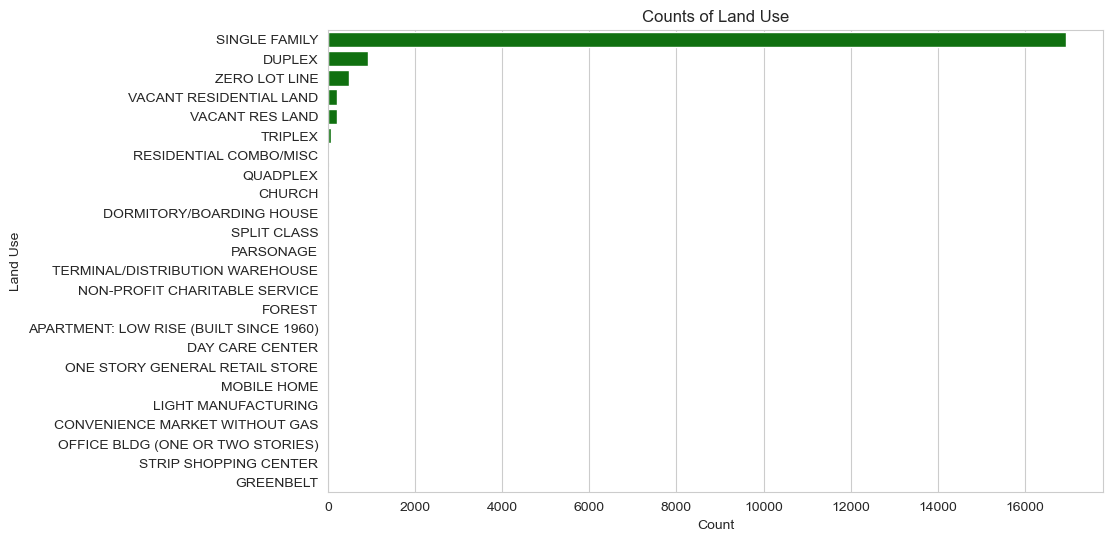

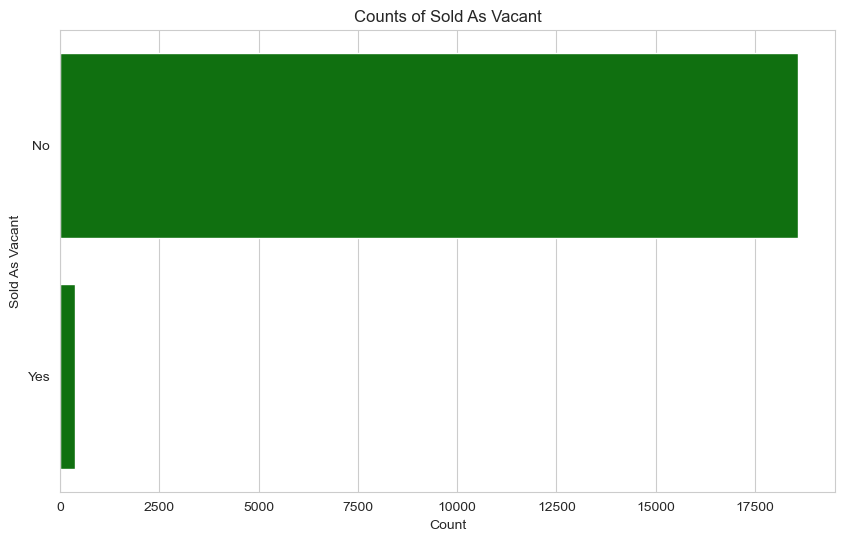

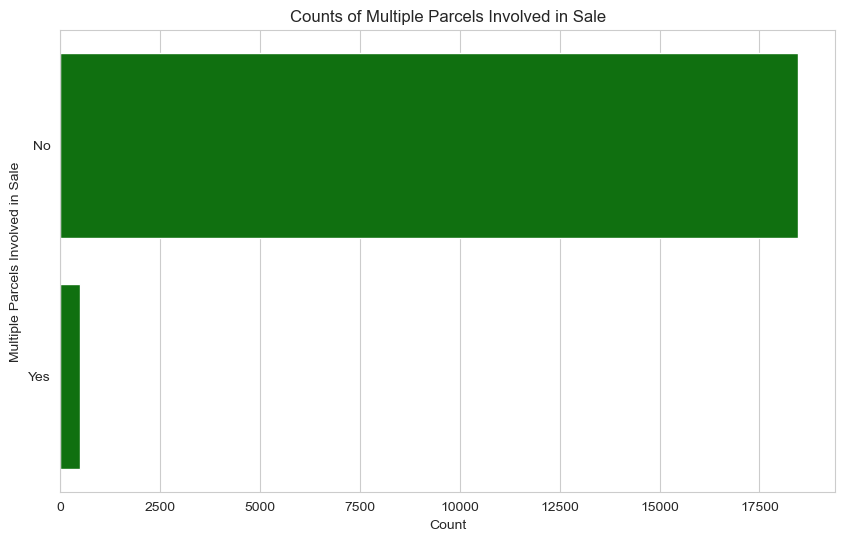

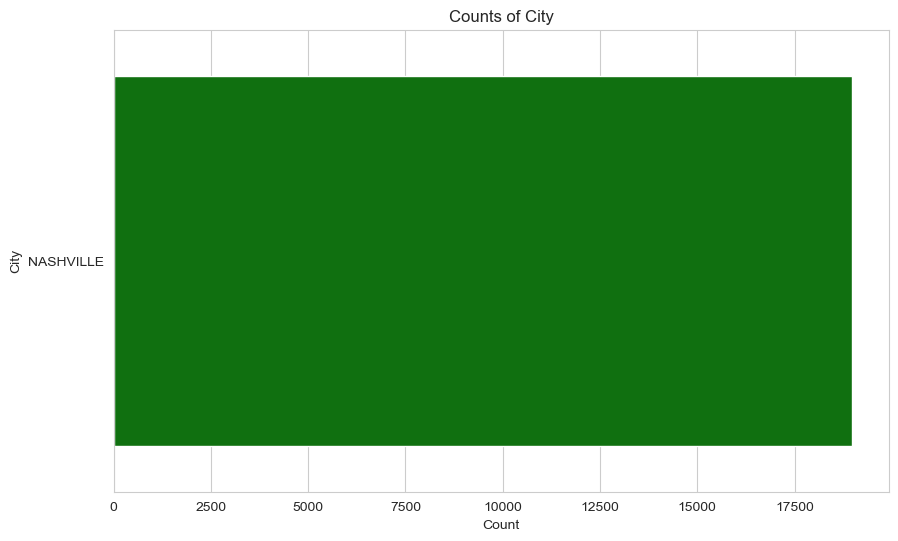

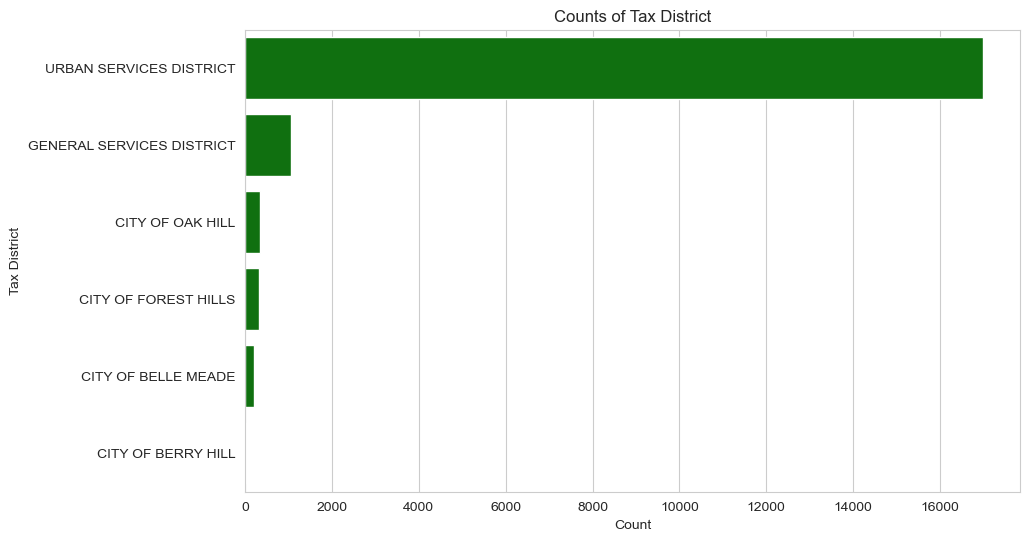

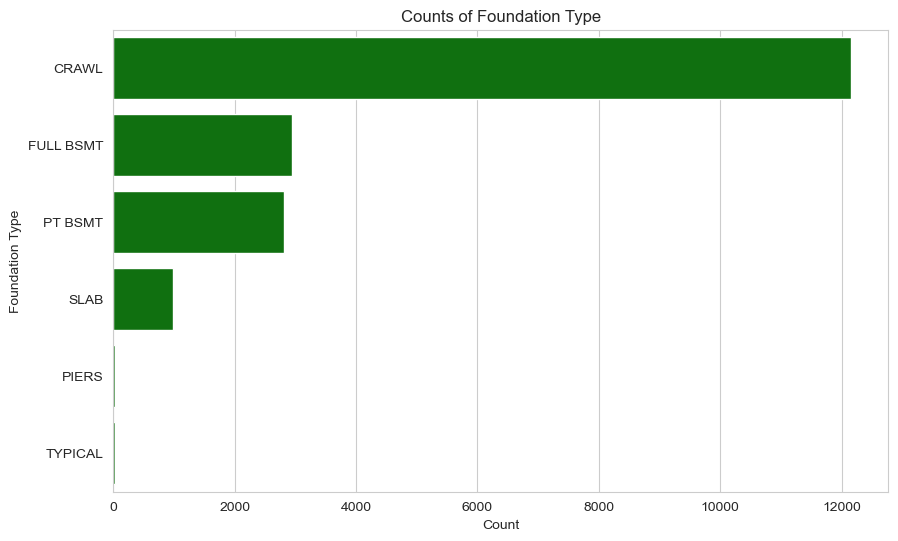

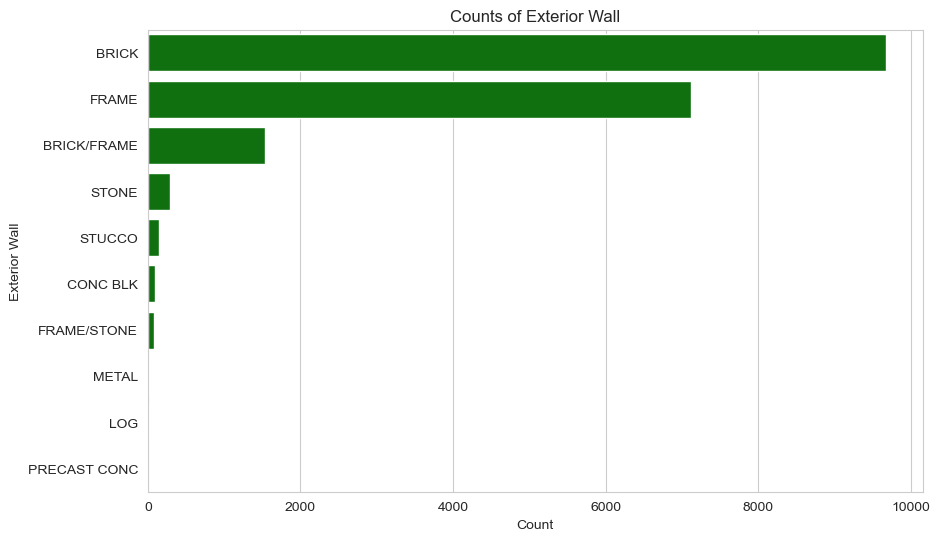

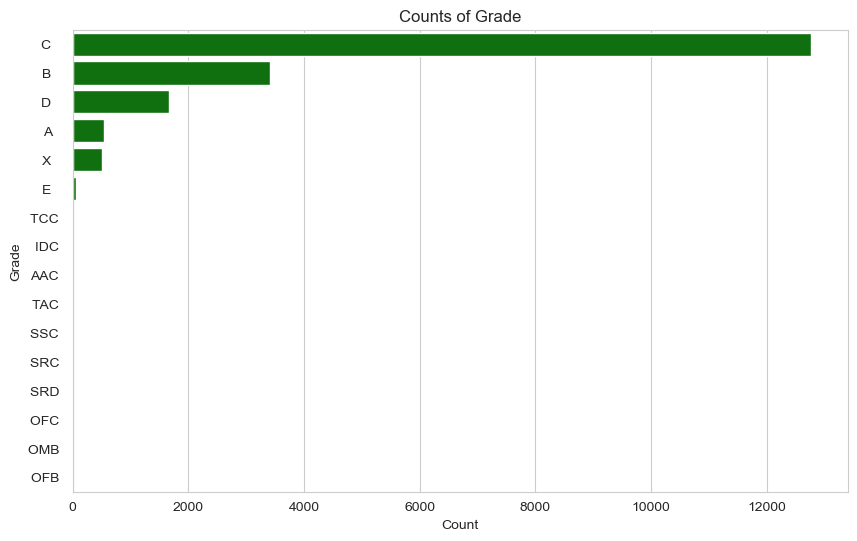

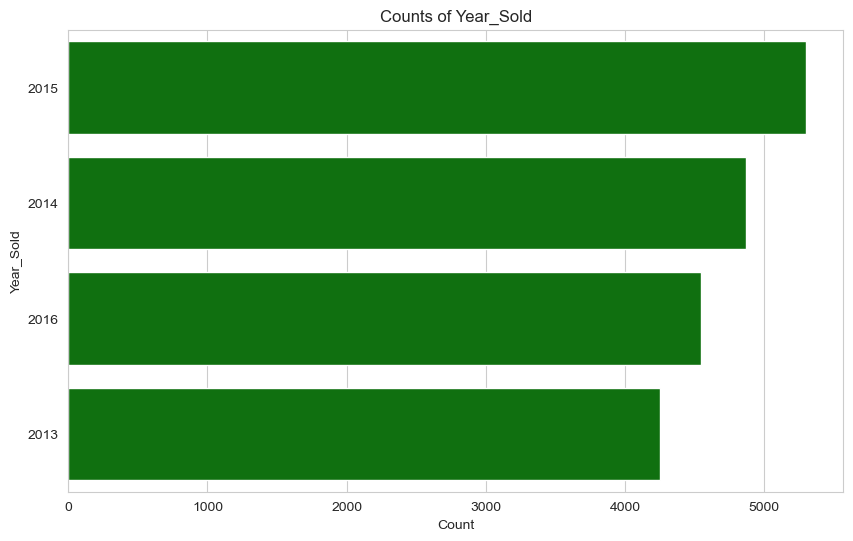

In [14]:
object_columns = dt.select_dtypes(include=['object'])

sns.set_style("whitegrid")

for column in object_columns:
    plt.figure(figsize=(10, 6))
    column_counts = dt[column].value_counts()
    sns.barplot(x=column_counts.values, y=column_counts.index, color='green')
    plt.title(f'Counts of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.show()

In [15]:
dt['Land Use'] = dt['Land Use'].replace('VACANT RES LAND', 'VACANT RESIDENTIAL LAND')

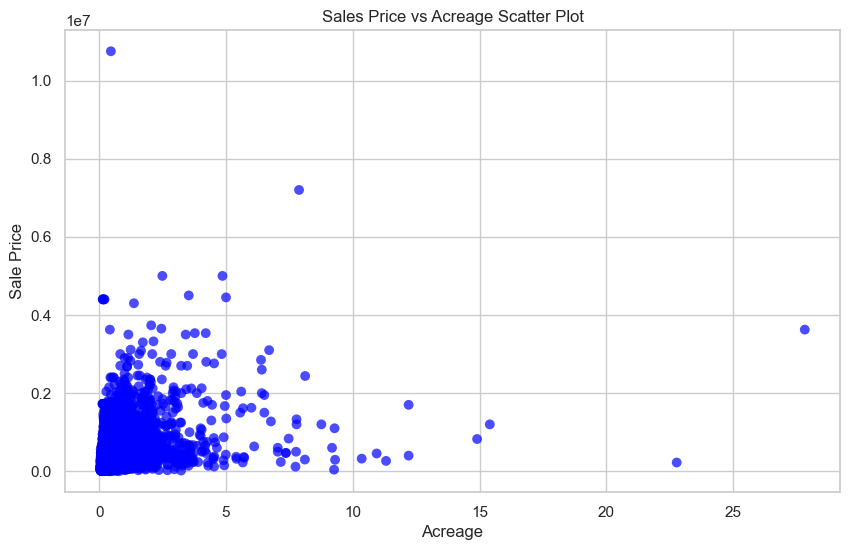

In [16]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='Acreage', y='Sale Price', data=dt, color='blue', alpha=0.7, marker='o', edgecolor='none', s=50)
plt.title('Sales Price vs Acreage Scatter Plot')
plt.xlabel('Acreage')
plt.ylabel('Sale Price')
plt.show()

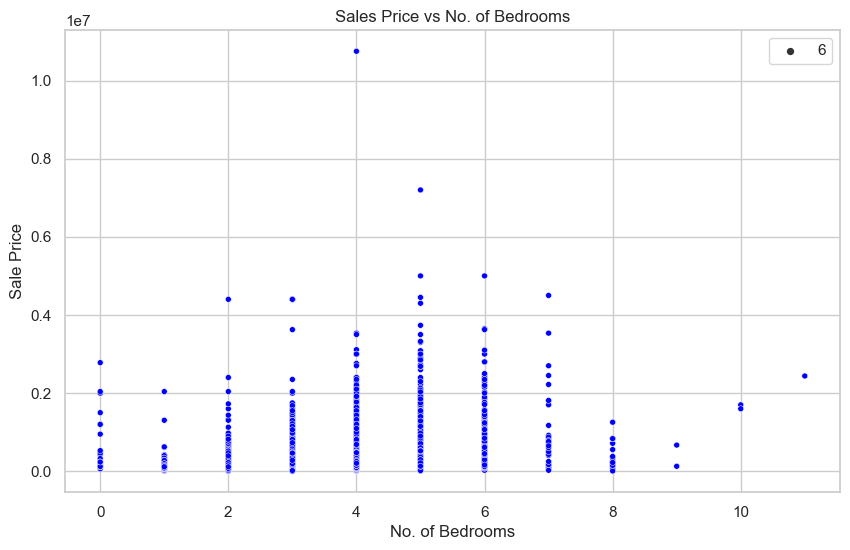

In [17]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Bedrooms', y='Sale Price', data=dt, color='blue', size=6)
plt.title('Sales Price vs No. of Bedrooms')
plt.xlabel('No. of Bedrooms')
plt.ylabel('Sale Price')
plt.show()

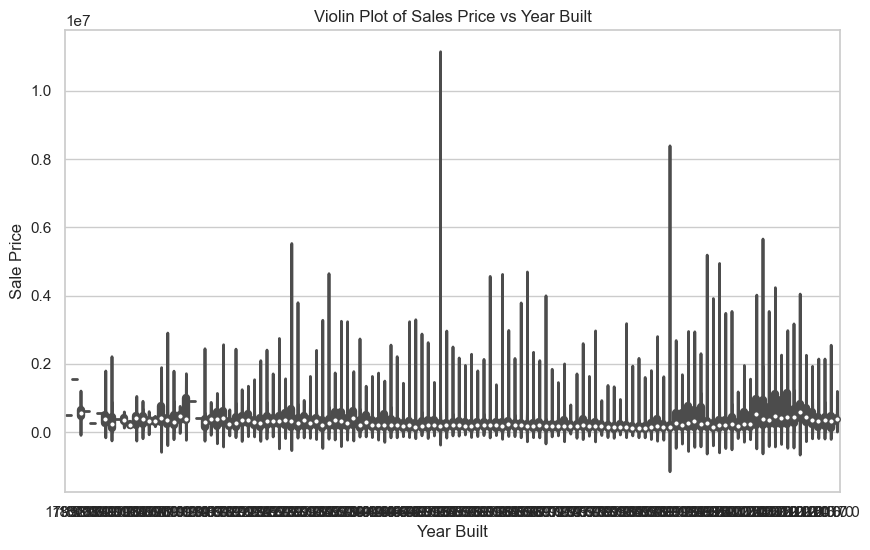

In [18]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.violinplot(x='Year Built', y='Sale Price', data=dt, color='blue', linewidth=2)
plt.title('Violin Plot of Sales Price vs Year Built')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.show()

<Figure size 1000x600 with 0 Axes>

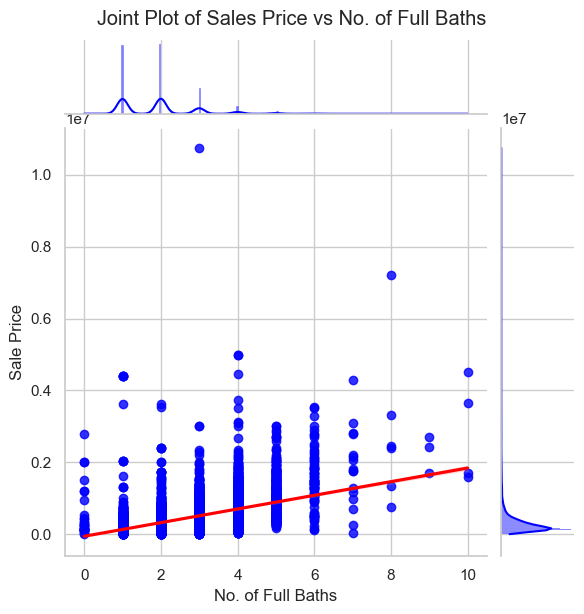

In [19]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.jointplot(x='Full Bath', y='Sale Price', data=dt, kind='reg', color='blue', scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.suptitle('Joint Plot of Sales Price vs No. of Full Baths', y=1.02)
plt.xlabel('No. of Full Baths')
plt.ylabel('Sale Price')
plt.show()


<Figure size 1000x600 with 0 Axes>

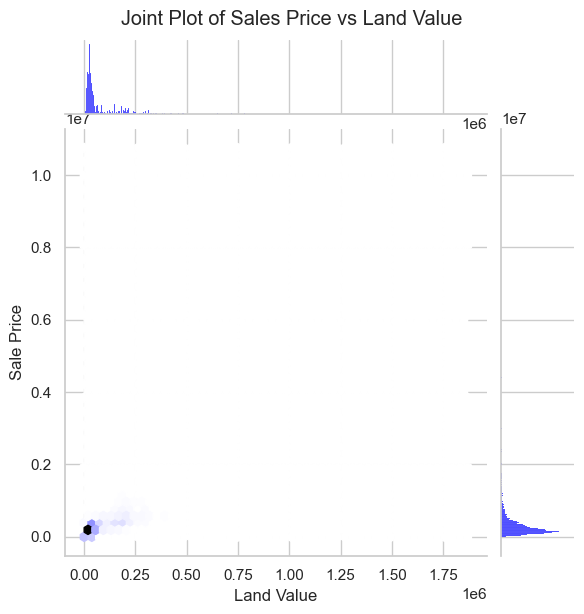

In [20]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.jointplot(x='Land Value', y='Sale Price', data=dt, kind='hex', color='blue')
plt.suptitle('Joint Plot of Sales Price vs Land Value', y=1.02)
plt.xlabel('Land Value')
plt.ylabel('Sale Price')
plt.show()

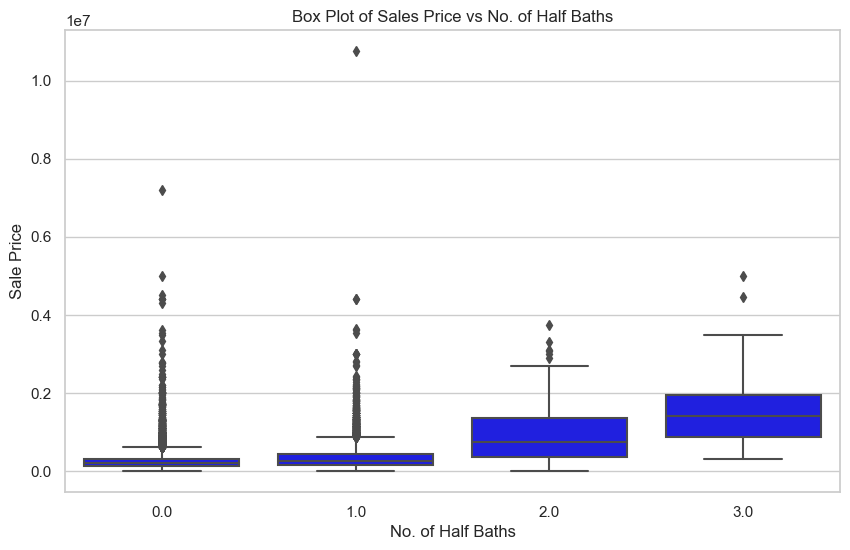

In [21]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(x='Half Bath', y='Sale Price', data=dt, color='blue')
plt.title('Box Plot of Sales Price vs No. of Half Baths')
plt.xlabel('No. of Half Baths')
plt.ylabel('Sale Price')
plt.show()

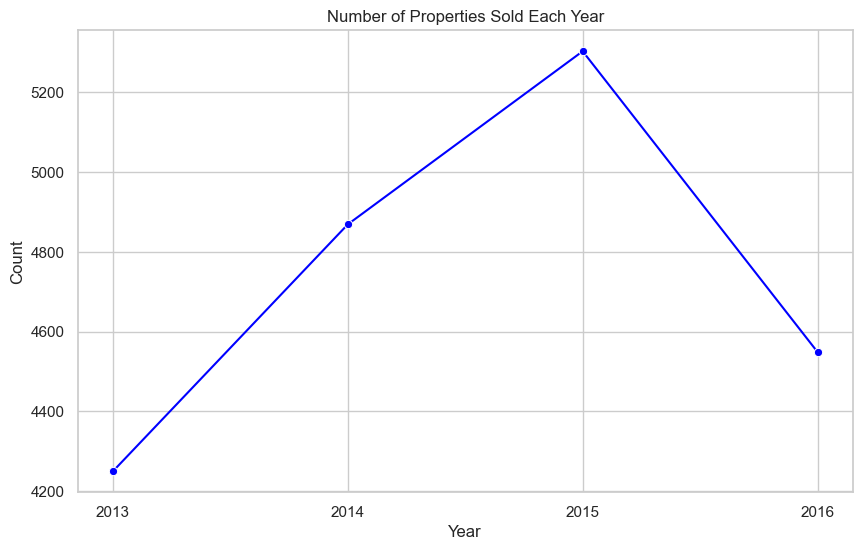

In [22]:
year_counts = dt['Year_Sold'].value_counts().sort_index()

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(x=year_counts.index, y=year_counts.values, color='blue', marker='o')
plt.title('Number of Properties Sold Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [23]:
dt = dt.copy()

# Function to label encode object columns
def label_encode_object_columns(df):
    le = LabelEncoder()
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = le.fit_transform(df[column])
    return df

# Encode object columns
dt = label_encode_object_columns(dt)
dt

,Land Use,Sale Price,Sold As Vacant,Multiple Parcels Involved in Sale,City,Acreage,Tax District,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Year_Sold
1,16,191500,0,0,0,0.17,5,3127.0,32000.0,134400.0,168300.0,1149.00000,3,1941.0,0,3,2.0,1.0,0.0,0
2,16,202000,0,0,0,0.11,1,9126.0,34000.0,157800.0,191800.0,2090.82495,4,2000.0,1,3,3.0,2.0,1.0,0
3,16,32000,0,0,0,0.17,5,3130.0,25000.0,243700.0,268700.0,2145.60001,1,1948.0,1,2,4.0,2.0,0.0,0
4,16,102000,0,0,0,0.34,5,3130.0,25000.0,138100.0,164800.0,1969.00000,0,1910.0,3,3,2.0,1.0,0.0,0
5,16,93736,0,0,0,0.17,5,3130.0,25000.0,86100.0,113300.0,1037.00000,0,1945.0,3,3,2.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56527,22,115080,0,0,0,0.15,5,4291.0,14500.0,70000.0,84500.0,1452.00000,0,1996.0,1,3,2.0,2.0,0.0,3
56528,16,194000,0,0,0,0.24,5,4291.0,22500.0,97700.0,120200.0,1912.00000,0,1989.0,3,3,3.0,3.0,0.0,3
56614,16,466000,0,0,0,0.15,5,126.0,40000.0,204100.0,256000.0,1637.00000,0,2004.0,3,2,3.0,2.0,1.0,3
56615,16,685000,0,0,0,0.19,5,126.0,40000.0,295900.0,351600.0,2478.00000,0,2005.0,3,2,4.0,3.0,1.0,3


In [24]:
scaler = MinMaxScaler()

dt = pd.DataFrame(scaler.fit_transform(dt), columns=dt.columns)
dt


,Land Use,Sale Price,Sold As Vacant,Multiple Parcels Involved in Sale,City,Acreage,Tax District,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Year_Sold
0,0.727273,0.017805,0.0,0.0,0.0,0.004680,1.0,0.320492,0.017069,0.022841,0.024366,0.036258,0.6,0.651376,0.000000,0.200000,0.181818,0.1,0.000000,0.0
1,0.727273,0.018782,0.0,0.0,0.0,0.002520,0.2,0.957126,0.018139,0.026859,0.028044,0.085113,0.8,0.922018,0.111111,0.200000,0.272727,0.2,0.333333,0.0
2,0.727273,0.002967,0.0,0.0,0.0,0.004680,1.0,0.320811,0.013323,0.041612,0.040078,0.087954,0.2,0.683486,0.111111,0.133333,0.363636,0.2,0.000000,0.0
3,0.727273,0.009479,0.0,0.0,0.0,0.010799,1.0,0.320811,0.013323,0.023476,0.023818,0.078793,0.0,0.509174,0.333333,0.200000,0.181818,0.1,0.000000,0.0
4,0.727273,0.008710,0.0,0.0,0.0,0.004680,1.0,0.320811,0.013323,0.014546,0.015759,0.030449,0.0,0.669725,0.333333,0.200000,0.181818,0.1,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18966,1.000000,0.010696,0.0,0.0,0.0,0.003960,1.0,0.444020,0.007705,0.011781,0.011252,0.051976,0.0,0.903670,0.111111,0.200000,0.181818,0.2,0.000000,1.0
18967,0.727273,0.018037,0.0,0.0,0.0,0.007199,1.0,0.444020,0.011986,0.016538,0.016839,0.075837,0.0,0.871560,0.333333,0.200000,0.272727,0.3,0.000000,1.0
18968,0.727273,0.043340,0.0,0.0,0.0,0.003960,1.0,0.002016,0.021349,0.034811,0.038091,0.061572,0.0,0.940367,0.333333,0.133333,0.272727,0.2,0.333333,1.0
18969,0.727273,0.063712,0.0,0.0,0.0,0.005400,1.0,0.002016,0.021349,0.050576,0.053052,0.105196,0.0,0.944954,0.333333,0.133333,0.363636,0.3,0.333333,1.0


In [25]:
features = dt[['Tax District', 'Neighborhood', 'Land Value', 'Finished Area',
               'Exterior Wall', 'Full Bath']]
target = dt['Sale Price']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42) # Split the data into training and testing sets

model = LinearRegression() # Initialize the linear regression model

model.fit(X_train, y_train) # Train the model on the training data

y_pred = model.predict(X_test) # Making predictions on the testing data

mse = mean_squared_error(y_test, y_pred) # Calculating the mean squared error
print("Mean Squared Error:", mse)

model_sm = sm.OLS(y_train, X_train).fit() # Fitting the statsmodels OLS model

print(model_sm.summary()) # identifying the summary of the statsmodels OLS model

Mean Squared Error: 0.0002532220181388688
                                 OLS Regression Results                                
Dep. Variable:             Sale Price   R-squared (uncentered):                   0.794
Model:                            OLS   Adj. R-squared (uncentered):              0.794
Method:                 Least Squares   F-statistic:                              9721.
Date:                Sun, 14 Apr 2024   Prob (F-statistic):                        0.00
Time:                        18:07:22   Log-Likelihood:                          38475.
No. Observations:               15176   AIC:                                 -7.694e+04
Df Residuals:                   15170   BIC:                                 -7.689e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.9

In [30]:
# Select features and target variable
features = dt[['Land Use', 'Sold As Vacant', 'Multiple Parcels Involved in Sale', 
                'Acreage', 'Tax District', 'Neighborhood', 'Land Value', 
                'Building Value', 'Total Value', 'Finished Area', 'Foundation Type',
                'Year Built', 'Exterior Wall', 'Grade', 'Bedrooms', 'Full Bath', 
                'Half Bath', 'Year_Sold']]
target = dt['Sale Price']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Defining models
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracy = model.score(X_test, y_test)  # Using score method for regression models
    results[name] = {"Mean Squared Error": mse, "R2 Score": r2, "Accuracy": accuracy}

# Display model performance
print("Model Performance Report:")
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Mean Squared Error: {metrics['Mean Squared Error']}")
    print(f"R2 Score: {metrics['R2 Score']}")
    print(f"Accuracy: {metrics['Accuracy']}")
    print("="*30)


Model Performance Report:
Model: Decision Tree
Mean Squared Error: 0.00025287323226682424
R2 Score: 0.6805385722435153
Accuracy: 0.6805385722435153
Model: Random Forest
Mean Squared Error: 0.00013729574628828335
R2 Score: 0.8265506604199744
Accuracy: 0.8265506604199744
Model: Gradient Boosting
Mean Squared Error: 0.000165741157232601
R2 Score: 0.7906148220873386
Accuracy: 0.7906148220873386


In [31]:
# Select features and target variable
features = dt[['Acreage', 'Tax District', 'Neighborhood', 'Land Value', 'Building Value', 
                'Finished Area', 'Foundation Type', 'Year Built', 'Exterior Wall', 
                'Grade', 'Bedrooms', 'Full Bath']]
target = dt['Sale Price']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define models
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracy = model.score(X_test, y_test)  # Using score method for regression models
    results[name] = {"Mean Squared Error": mse, "R2 Score": r2, "Accuracy": accuracy}

# Display model performance
print("Model Performance Report:")
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Mean Squared Error: {metrics['Mean Squared Error']}")
    print(f"R2 Score: {metrics['R2 Score']}")
    print(f"Accuracy: {metrics['Accuracy']}")
    print("="*30)


Model Performance Report:
Model: Decision Tree
Mean Squared Error: 0.0004064150733129078
R2 Score: 0.48656511241450395
Accuracy: 0.48656511241450395
Model: Random Forest
Mean Squared Error: 0.00026385599829566403
R2 Score: 0.6666637540793435
Accuracy: 0.6666637540793435
Model: Gradient Boosting
Mean Squared Error: 0.00021781728304777248
R2 Score: 0.7248256780335827
Accuracy: 0.7248256780335827


In [33]:
# Select features and target variable
features = dt[['Tax District', 'Neighborhood', 'Land Value', 'Finished Area', 'Exterior Wall', 'Full Bath']]
target = dt['Sale Price']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define models
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracy = model.score(X_test, y_test)  # Using score method for regression models
    results[name] = {"Mean Squared Error": mse, "R2 Score": r2, "Accuracy": accuracy}

# Display model performance
print("Model Performance Report:")
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Mean Squared Error: {metrics['Mean Squared Error']}")
    print(f"R2 Score: {metrics['R2 Score']}")
    print(f"Accuracy: {metrics['Accuracy']}")
    print("="*30)


Model Performance Report:
Model: Decision Tree
Mean Squared Error: 0.0005689761549039852
R2 Score: 0.281197407983349
Accuracy: 0.281197407983349
Model: Random Forest
Mean Squared Error: 0.0003156295267306428
R2 Score: 0.6012568892816604
Accuracy: 0.6012568892816604
Model: Gradient Boosting
Mean Squared Error: 0.00027740825992065947
R2 Score: 0.6495428243184498
Accuracy: 0.6495428243184498
